# Lista 04 - Teste de Hipótese

In [1]:
#Defina a semente de geração de números aleatórios
#Não gerem mais números aleatórios do que o necessário, ou a correção dará errado
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2019104)

# Exercício 01:

Em uma determinada universidade, foi realizada uma entrevista em que se desejava coletar respostas de alunos de todas as grandes áreas de conhecimento. Dentre os 1000 entrevistados, cada área teve a seguinte quantidade de alunos:

* Exatas: 100
* Humanas: 600
* Biológicas: 300

No entanto, a qualidade da amostra foi questionada. Argumentou-se que a proporção de alunos de Humanas entrevistados foi muito maior que a proporção de alunos da mesma área na universidade como um todo. Na universidade, há cadastro de:

* 2000 alunos de Exatas
* 8000 alunos de Humanas
* 2500 alunos de Biológicas

A) Retorne uma lista de True ou False de acordo com as afirmativas abaixo:

    1: A respeito da hipótese nula, podemos realizar testes que nos permitam aceitá-la como verdadeira.
    2: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista não foi gerada de forma uniformemente aleatória".
    3: Podemos definir a seguinte hipótese nula: "A amostra utilizada na entrevista foi gerada de forma uniformemente aleatória".
    
Exemplo:

```python
def q1a():
    return [ False, False, False ]
```

In [3]:
def q1a():
    return [True, True, True]

B) Para comparar as distribuições, implemente a métrica de Total Variation Distance.

In [4]:
def tvd(p, q):
    return np.sum(np.abs(p - q)) / 2

In [5]:
from numpy.testing import *
pop = np.array([0.15, 0.18, 0.12, 0.54, 0.01])
samp = np.array([0.26, 0.08, 0.08, 0.54, 0.04])
assert_equal( tvd(pop,samp), 0.14 )

C) Calcule o TVD da amostra utilizada na entrevista

__Dica:__ A Total Variation Distance é uma métrica de distância entre distribuições de probabilidade, não entre quantidades absolutas.

In [6]:
def q1c():
    samp = np.array([0.1, 0.6, 0.3])
    pop = np.array([0.16,0.64,0.2])
    return np.sum(np.abs(pop - samp)) / 2

In [7]:
q1c()

0.1

D) Implemente a função que simule uma amostra uniformemente aleatória, retornando uma lista de proporções para cada categoria (Exatas, Humanas, Biológicas).

Exemplo: 
```python
def gera_amostra(tamanho_amostra):
    return [0.6, 0.0, 0.4]
```
__Dica:__ crie uma lista para a população (indicando a área de conhecimento do estudante por 0,1 ou 2, por exemplo) e use a função ```numpy.random.shuffle``` para embaralhar os dados. Depois, pegue os primeiros elementos da lista para formar a amostra, e calcule as proporções a partir disso.

In [8]:
def gera_amostra(tamanho_amostra):
    exatas = [0] * 2000
    humanas = [1] * 8000
    biologicas = [2] * 2500
    ams = exatas + humanas + biologicas
    np.random.shuffle(ams)
    ams = ams[:tamanho_amostra]
    return[ams.count(0)/tamanho_amostra, ams.count(1)/tamanho_amostra, ams.count(2)/tamanho_amostra]

E) Gere 10000 amostras, e plote o gráfico de distribuição dos valores de TVD. Coloque no gráfico um ponto mostrando o TVD da amostra da entrevista.

[0. 1. 0.]
0.36


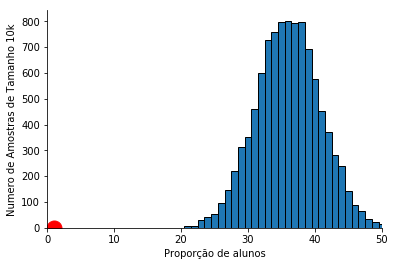

In [9]:
pop = np.array([0.16,0.64,0.2])
samp = np.array(gera_amostra(10))
print(samp)
prop = tvd(pop, samp)
print(prop)


def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

def sample_proportion(pop_size, prop, n=10000):
    assert(prop >= 0)
    assert(prop <= 1)
    
    grupo = pop_size * prop
    resultados = np.zeros(n)
    for i in range(n):
        sample = np.random.randint(0, pop_size, 100)
        resultados[i] = np.sum(sample < grupo)
    return resultados

proporcoes = sample_proportion(pop_size=12500, prop=prop)
bins = np.linspace(1, 100, 100) + 0.5
plt.hist(proporcoes, bins=bins, edgecolor='k')
plt.xlim(0, 50)
plt.ylabel('Numero de Amostras de Tamanho 10k')
plt.xlabel('Proporção de alunos')
plt.plot([1], [0], 'ro', ms=15)
despine()

F) Escreva uma função que retorne a partir de qual valor de TVD não estamos mais dentro do intervalo de 90% de confiança

In [10]:
def q1f():
    # YOUR CODE HERE
    raise NotImplementedError()

# Exercício 02:

Usando os dados do arquivo ```baby.csv```, vamos realizar um teste por permutação.

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,3.401940,284,27,1.5748,2.834950,False
1,3.203493,282,33,1.6256,3.827183,False
2,3.628736,279,28,1.6256,3.260193,True
3,3.061746,282,23,1.7018,3.543687,True
4,3.855532,286,25,1.5748,2.636503,False


A) Implemente uma função que retorne a diferença entre a média dos pesos dos bebês para as mães fumantes e a média para as mães não fumantes. Exemplo:

```python
def q2a(df):
    media_fumantes = 3.1
    media_nao_fumantes = 3.8
    return -0.7
```

In [14]:
def q2a(df):
    media_fumantes = np.mean(df[df['Maternal Smoker'] == True]['Birth Weight'].values)
    media_nao_fumantes = np.mean(df[df['Maternal Smoker'] == False]['Birth Weight'].values)
    return(media_fumantes - media_nao_fumantes)

In [15]:
q2a(df)

-0.2626905088456204

B) Realize permutações com os rótulos (mães fumantes / não fumantes), de tamanhos ```[10,100,500,1000,5000]```. Plote gráficos mostrando a distribuição das diferenças entre as médias de peso dos bebês, conforme se aumenta a quantidade de permutações. Ou seja, um gráfico para 10 permutações, um para 100, e assim por diante.

Como exemplo, a imagem abaixo mostra o gráfico para 100 permutações.

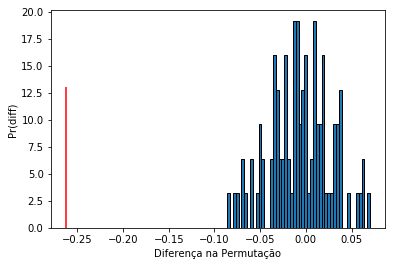

In [16]:
from IPython.display import Image
Image('100permutacoes.png')

In [34]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

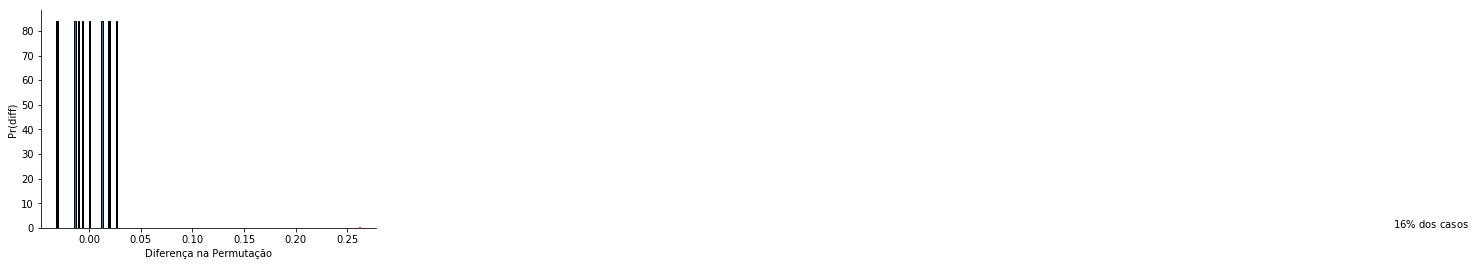

In [39]:
filtro = df['Maternal Smoker'] == True

t_obs = df[~filtro]['Birth Weight'].mean() - df[filtro]['Birth Weight'].mean()

N = 10
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = df[~filtro]['Birth Weight'].mean() - df[filtro]['Birth Weight'].mean()
    diferencas[i] = diff
    
plt.hist(diferencas, bins=50, density=True, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(t_obs, 0, 0.14, color='red')
plt.text(t_obs+1, 0.10, '$16\%$ dos casos')
despine()
plt.show()

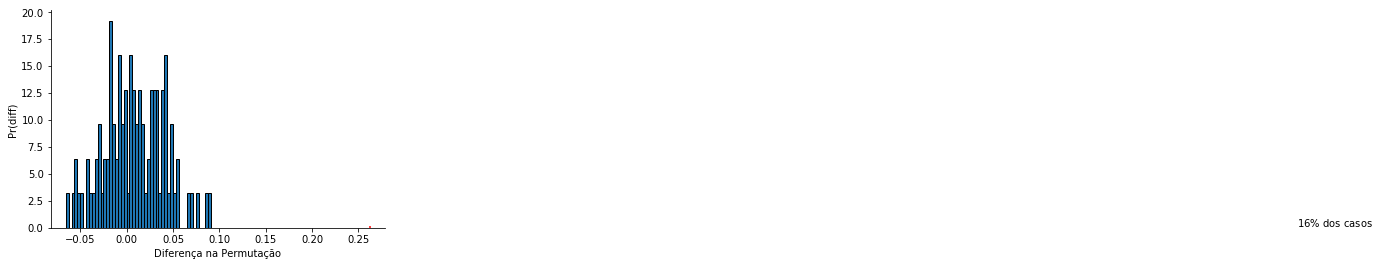

In [40]:
N = 100
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = df[~filtro]['Birth Weight'].mean() - df[filtro]['Birth Weight'].mean()
    diferencas[i] = diff
    
plt.hist(diferencas, bins=50, density=True, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(t_obs, 0, 0.14, color='red')
plt.text(t_obs+1, 0.10, '$16\%$ dos casos')
despine()
plt.show()

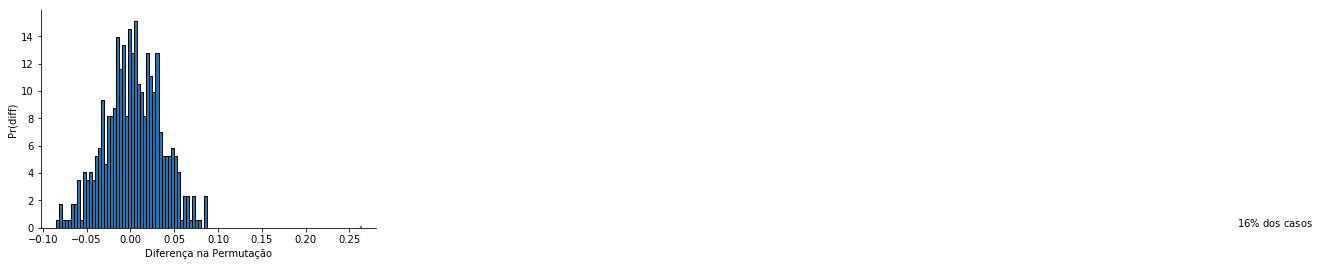

In [41]:
N = 500
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = df[~filtro]['Birth Weight'].mean() - df[filtro]['Birth Weight'].mean()
    diferencas[i] = diff
    
plt.hist(diferencas, bins=50, density=True, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(t_obs, 0, 0.14, color='red')
plt.text(t_obs+1, 0.10, '$16\%$ dos casos')
despine()
plt.show()

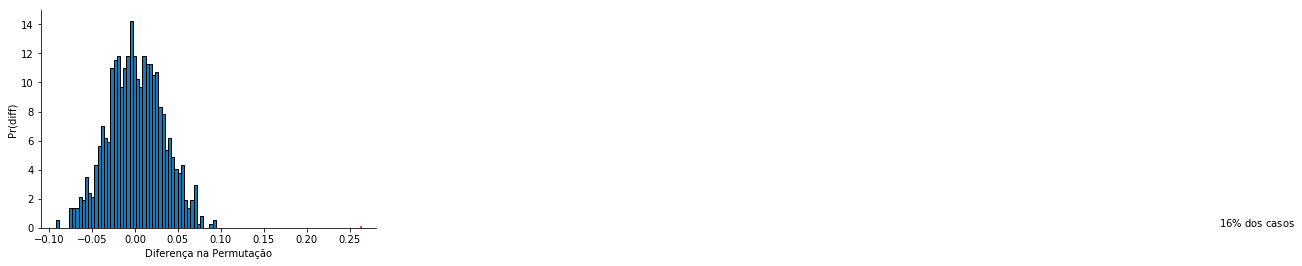

In [42]:
N = 1000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = df[~filtro]['Birth Weight'].mean() - df[filtro]['Birth Weight'].mean()
    diferencas[i] = diff
    
plt.hist(diferencas, bins=50, density=True, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(t_obs, 0, 0.14, color='red')
plt.text(t_obs+1, 0.10, '$16\%$ dos casos')
despine()
plt.show()

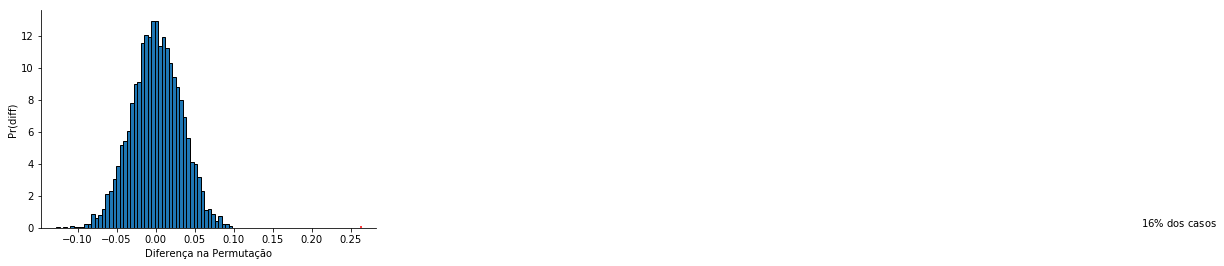

In [43]:
N = 5000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = df[~filtro]['Birth Weight'].mean() - df[filtro]['Birth Weight'].mean()
    diferencas[i] = diff
    
plt.hist(diferencas, bins=50, density=True, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(t_obs, 0, 0.14, color='red')
plt.text(t_obs+1, 0.10, '$16\%$ dos casos')
despine()
plt.show()

B) Escreva abaixo o que você observou com os gráficos.

A medida que o número de amostras aumenta, o comportamento dos gráficos se aproxima de uma ditribuição normal.